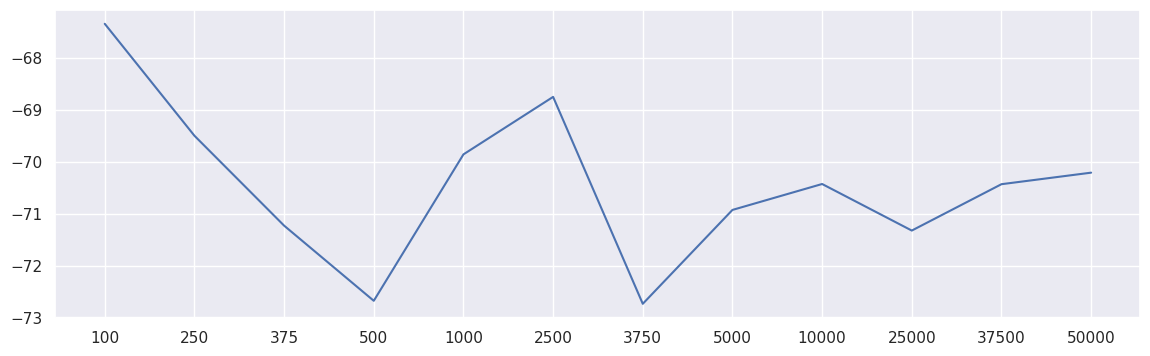

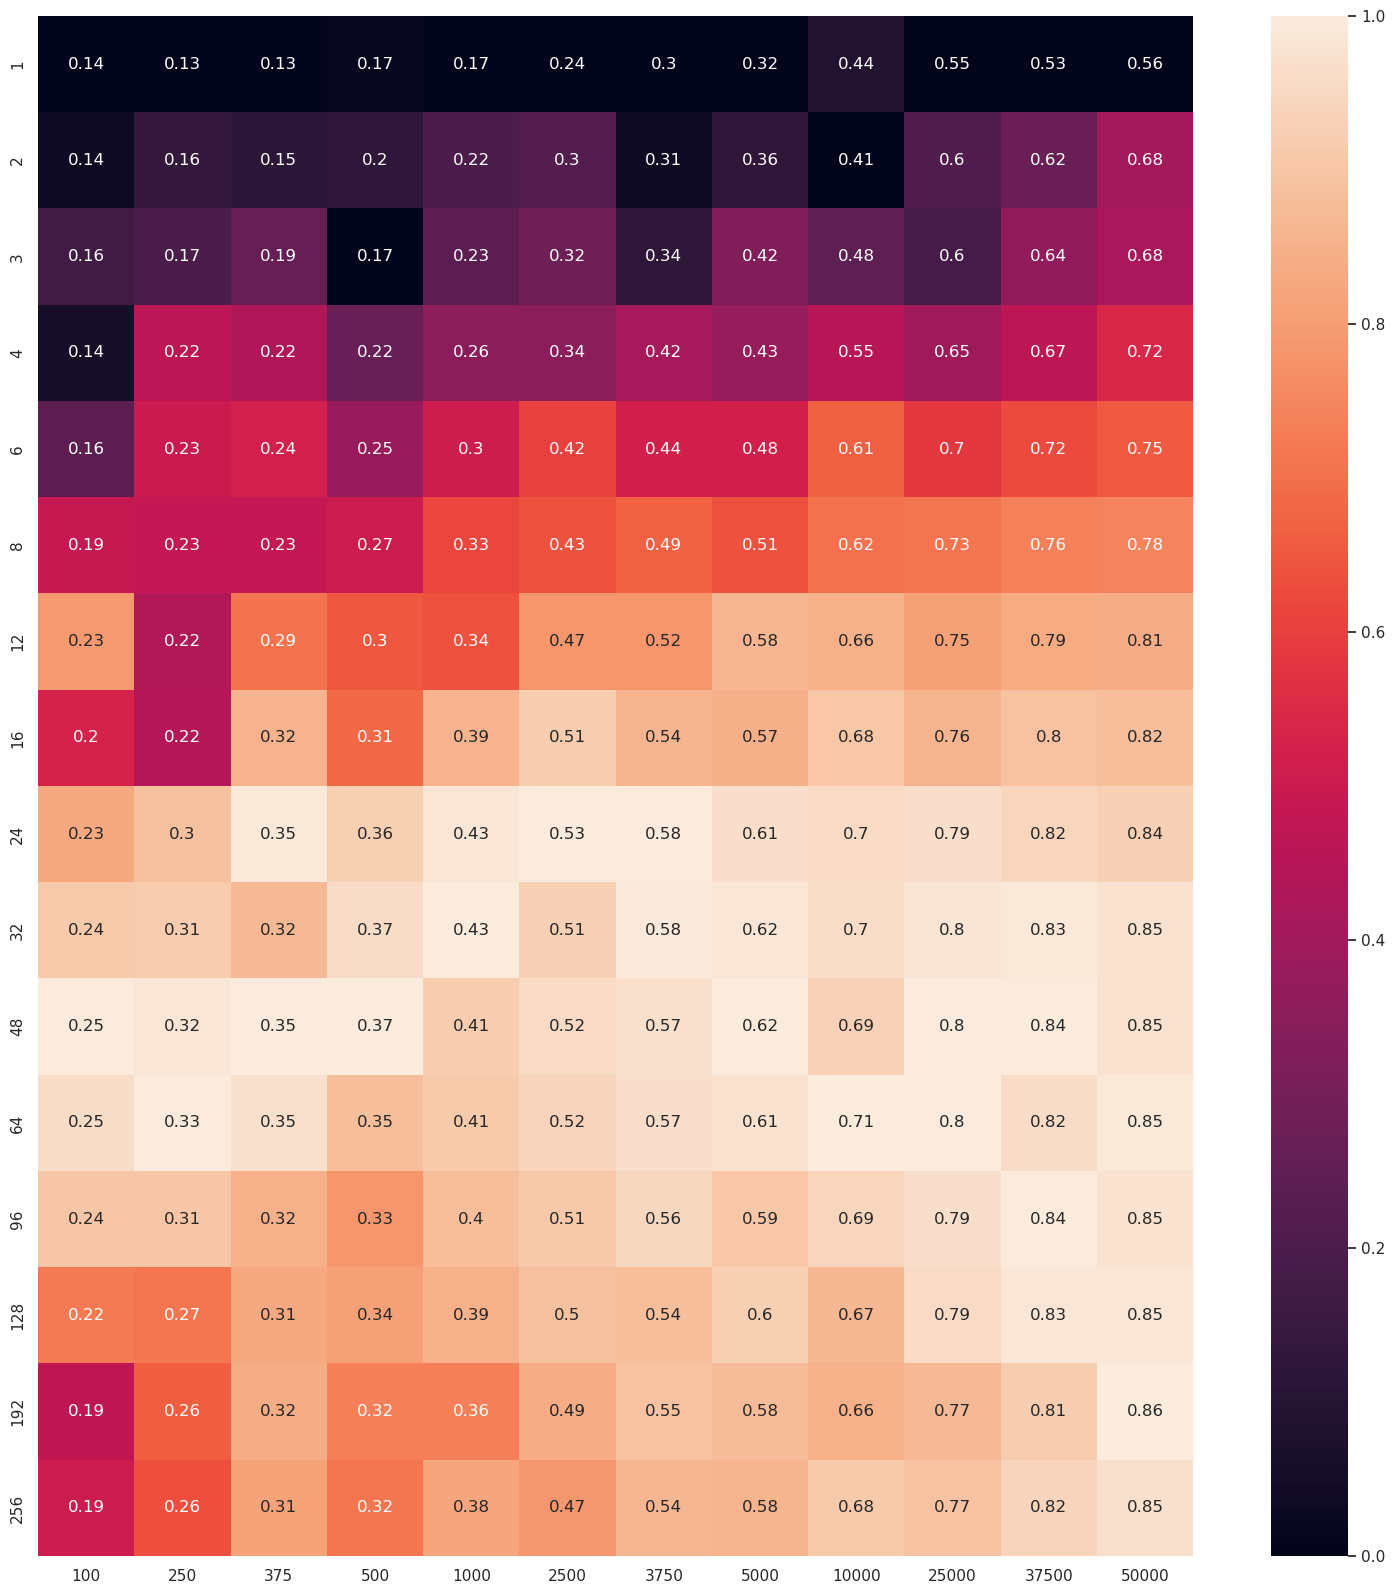

In [11]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def heat_pivot(df, values, index, columns, aggregate_function=None, annot_rescale=False, color_rescale=False):
    df = df.pivot(values=values, index=index, columns=columns, aggregate_function=aggregate_function)
    df = df.reverse()
    df = df.select(df.columns[::-1])
    df_ind_ser= df.select(index).to_series()
    df = df.select(pl.all().exclude(index))

    xlabels = df.columns
    ylabels = df_ind_ser
    
    def rescale(df):
        for col_name in df.columns:
            col_ser = df[col_name]
            max_val = col_ser.max()
            min_val = col_ser.min()

            df = df.with_columns(pl.col(col_name).sub(min_val).truediv(max_val - min_val))
        return df

    re_df = rescale(df)
    

    def col_prop(df):
        for col_name in df.columns:
            col_ser = df[col_name]
            sum_val = col_ser.sum()

            df = df.with_columns(pl.col(col_name).truediv(sum_val))
        return df

    prop_df = col_prop(re_df)

    prop_df = (prop_df * df_ind_ser).sum()
    
    prop_df.write_csv("./prop.csv")
    tmp = prop_df.row(0)
    tmp2 = []
    for t in tmp: tmp2.append(t*-1)
    plt.figure(figsize=(14, 4))
    plt.plot(prop_df.columns, tmp2)
    plt.show()
    

    
    
    


    if annot_rescale: annot_C = re_df.to_numpy()
    else: annot_C = df.to_numpy()

    if color_rescale: color_C = re_df.to_numpy()
    else: color_C = df.to_numpy()

    
    sns.set(rc={"figure.figsize": (20, 20)})
    sns.heatmap(color_C, annot=annot_C, cbar=True, square=True, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()



    # rows, cols = C.shape
#     fig, ax = plt.subplots()
#     mappable = ax.pcolor(C)
#     ax.set_xlabel("x axis")
#     ax.set_ylabel("y axis")
#     ax.set_title("Heatmap")

    
#     for i in range(rows):
#         for j in range(cols):
#             plt.text(j+0.5, i+0.5, C[i, j], ha="center", va="center")
    
#     plt.xticks(np.arange(0.5, cols+0.5), xlabels, rotation=90) # x軸の目盛りとラベルを設定し、ラベルを90度回転させる
#     plt.yticks(np.arange(0.5, rows+0.5), ylabels) # y軸の目盛りとラベルを設定
#     plt.colorbar(mappable, ax=ax)

    # plt.show()

    

# path = "./unify_iters.csv"
# df = pl.read_csv(path)
# heat_pivot(df, values="val_acc", index="fils", columns="num_data", aggregate_function=None, annot_rescale=False, color_rescale=True)

# path = "./unify_batch.csv"
# df = pl.read_csv(path)
# heat_pivot(df, values="vAcc", index="fils", columns="num_data", aggregate_function=None, annot_rescale=False, color_rescale=True)

path = "./unify_batch_noDA.csv"
df = pl.read_csv(path)
heat_pivot(df, values="vAcc", index="fils", columns="num_data", aggregate_function=None, annot_rescale=False, color_rescale=True)


